In [1]:
import twint
import nest_asyncio
import pandas as pd
import re
import operator
import plotly.graph_objects as go
from networkx.algorithms import bipartite
import networkx as nx
%matplotlib notebook
import itertools
import matplotlib.pyplot as plt
import ast
nest_asyncio.apply()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
#track_list
track_list = ["sustainability",
"sustainable",
"ecofriendly",
"environment",
"zerowaste",
"sustainableliving",
"climatechange",
"environment",
"gogreen",
"nature",
"recycle",
"plasticfree",
"eco",
"reuse",
"green",
"savetheplanet",
"organic",
"vegan",
"ethicalfashion",
"noplastic",
"plastic",
"renewables",
"renewableenergy",
"globalwarming",
"greenliving",
"pollution",
"reduce",
"sustainabilitymatters",
"climateaction",
"conservation",
"savetheearth",
"climate",
"energy",
"reducereuserecycle",
"sdgs",
"waste",
"emissions",
"energy",
"biodiversity",
"environmental",
"globalwarming",
"deforestation",
"plastics",
"greenhouse",
"greenhousegas",
"oceanplastics",
"sustainabilitymatters",
"ocean",
"savetheworld",
"wildlife",
"alternateenergy",
"microplastics",
"circulareconomy",
"ethicalconsumption",
"climatestrike",
"FridaysForFuture",
"CleanTech",
]

languages_list=["en"]



# "EnergyHarvesting",
# "CradletoCradle",
# "C2C",
# "cradle2cradle",
# "sustainablepackaging",
# "packagingwaste",
# "carbonemission",
# "carbonfootprint",
# "recycling",
# "socialentrepreneurship",
# "socialentrepreneur",
# "corporatecitizenship",
# "ecovadis",
# "corporatesocialresponsibility",
# "csr",
# "tellthetruth",
# "ftse4good",
# "climatecrisis",
# "palmoil",
# "footprint",
# "Industrialwaste",
# "consumerwaste",
# "environmentalprotection",
# "greencomputing",
# "greechemistry",
# "earthscience",
# "environmentalscience",
# "conservation",
# "Ecologicaleconomics",
# "Sustainabledevelopment",
# "ecovillage",
# "ecomunicipality",
# "sustainablecity",
# "permaculture",
# "greenbuilding",
# "sustainableagriculture",
# "sustainablearchitecture",
# "greentechnologies",
# "renewableenergy",
# "environmentaldegradation",
# "overconsumption",
# "populationgrowth",
# "carbondioxide",
# "Tippingpoint",
# "climatology",
# "Biogeochemical",
# "nitrogen",
# "phosphorus",
# "acidification",
# "saturation",
# "aragonite",
# "Freshwater",
# "Ozonedepletion",
# "ozone",
# "aerosols",
# "Chemicalpollution",
# "endocrinedisruptors",
# "heavymetals",
# "radioactivity",
# "contamination",
# "habitatdestruction",
# "erosion",
# "salinization",
# "fertilitylosses",
# "Watermanagement",
# "Overhunting",
# "Overfishing",
# "Overpopulation",
# "toxins",
# "Energyshortage",
# "Energyefficiency,",
# "Energyconservation",
# "Organicagriculture",
# "Regenerativeagriculture",
# "reforestation",
# "forestconservation",
# "Steadystate",
# "Sustainabledevelopment",
# "Degrowth",
# "Anticonsumerism"

In [3]:
#get tweets
#https://github.com/twintproject/twint/wiki/Configuration
tweets = pd.DataFrame()
for track_item in track_list:
    c = twint.Config()
    c.Search = track_item
    c.Lang = 'en'
    c.Pandas =True
    c.Min_retweets=20        
    c.Limit = 50
    c.Since = '2020-06-01 00:00:01' 
    # Run
    twint.run.Search(c)
    tweets = tweets.append(twint.storage.panda.Tweets_df)


1295346540421287939 2020-08-17 15:07:36 +0200 <patgagnon_75> The Conservative Party of Canada gaslighting since 2003. For a party that speaks of uniting Canada from coast to coast and ushering us into a new age of prosperity, they sure spent a lot of time creating as many divisions as possible while opposing inovation & sustainability.
1295336006221275136 2020-08-17 14:25:44 +0200 <NidiiM> #2YearsOfAchievements This ranking will invoke competition among cities for improving their infrastructure and environment sustainability. They will be judged on different criteria including sanitation.  pic.twitter.com/3zqp6v6n9M
1295308078339035142 2020-08-17 12:34:46 +0200 <wiseshow> If you missed the webinar on Sustainability a couple of weeks back, you can replay via the link below👇. Part of ‘The Conversation’, a series of events facilitated by @WeAreInvictus to share ideas, experiences & knowledge & promote collaboration.   https://m.youtube.com/watch?feature=youtu.be&v=_f0LqVS6sZ8 … pic.twitte

1294852075805765632 2020-08-16 06:22:46 +0200 <pondy_pandi> The complete autonomy status granted by NEP to achieve self sustainability will be a grave threat to sovereignty in education. The rich will benefit higher and the poor pushed down further to the bottom pits of society denying education. #TNRejectsNEP pic.twitter.com/Owm1TFscH3
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294851920113229824 2020-08-16 06:22:09 +0200 <pondy_pandi> The complete autonomy status granted by NEP to achieve self sustainability will be a grave threat to sovereignty in education. The rich will benefit higher and the poor pushed down further to the bottom pits of society denying education. #TNRejectsNEP pic.twitt

1295271638938923008 2020-08-17 10:09:58 +0200 <DSNY_A> I did a thing over the weekend and all I can say is #sustainable Bae is in the building *@XuroMilton1 ’s voice  pic.twitter.com/cG0OwPgKOe
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295262844238397441 2020-08-17 09:35:01 +0200 <NobelPrize> Elinor Ostrom's work challenged economists' ideas about sharing and cooperation. She showed that communities could self-manage resources they shared - like land, food or water - in a sustainable way.   Previous research said that common resources would eventually be depleted.  pic.twitter.com/eXA4lqoNO2
1295258383357038593 2020-08-17 09:17:17 +0200 <CWOFM> Handmade dining tables made to order at our Suss

1295242851090038785 2020-08-17 08:15:34 +0200 <samm_designs> SOLD!!! Good little post run this morning. Want to send me back again tomorrow? 😉 #EarlyBiz #ecofriendly #recycledfashion  http://buff.ly/2SMpkvV  pic.twitter.com/G1vnFJpYdC
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295153964464377864 2020-08-17 02:22:22 +0200 <AmiAmiGocco> 3D 2 Layer Face Mask Cotton Reusable Washable Dust Mask Eco Friendly Travel Mask Face Cover Mouth Cover Kawaii Lemon Fashion Mask  https://etsy.me/3g3m08n  via @Etsy
1295110436292001793 2020-08-16 23:29:24 +0200 <libertysoap> Floral Bouquet Soap, Daisy Chain, Baby's Breath, Hand-Crafted Soap, Cocoa Butter Soap, Vegan Soap, Floral Soap, Flower Soap, Large Bar Soap 

1293844072759730176 2020-08-13 11:37:20 +0200 <ASWordsmith> Transportation infrastructure paves the way for economic growth. With BRT Peshawar & eco friendly zu bicycles (fees starting at Rs 10/-) Peshawar is setting the benchmark for Pakistan. Congratulations to us all on the successful completion of BRT Peshawar. #ZuPeshawarBRT pic.twitter.com/P7fCnxjfSu
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1293811999525093381 2020-08-13 09:29:53 +0200 <LovePower_page> eco friendly invention 👍👏🤩😊😉  pic.twitter.com/iVw4xwHDts
1293811871045361665 2020-08-13 09:29:22 +0200 <libertysoap> Love Spell Handmade Soap, Victoria Secret Scent Soap, Cold Processed Soap, Girly Soap, Large Bar Body Soap, All Natural, 

1295336528139427841 2020-08-17 14:27:49 +0200 <NidiiM> #2YearsOfAchievements  it is yet another positive move towards improving environment and cleanliness in the country by the incumbent government.  pic.twitter.com/3zEdn4eThE
1295336006221275136 2020-08-17 14:25:44 +0200 <NidiiM> #2YearsOfAchievements This ranking will invoke competition among cities for improving their infrastructure and environment sustainability. They will be judged on different criteria including sanitation.  pic.twitter.com/3zqp6v6n9M
1295333370281496577 2020-08-17 14:15:16 +0200 <audubonsociety> From a toxic, dusty environment to a healthy, thriving landscape complete with waterfowl and shorebirds, California's Owens Lake is a testament to what community conservation efforts can achieve.  https://www.audubon.org/news/from-toxic-dustbowl-vital-bird-sanctuary …
1295331902279372805 2020-08-17 14:09:26 +0200 <3M_B9_> The critical analysis of CPEC role in generating inexpensive and environment-friendly electricity d

1295213804108820481 2020-08-17 06:20:09 +0200 <lamingogarden> #NewProfilePic Love for our #environment We still preach ZERO waste.  We are more than just a garden.  pic.twitter.com/hgLJqVynTi
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294947259256156160 2020-08-16 12:41:00 +0200 <enricomolinari> All relations between oceans & #circulareconomy TY @wef via @enricomolinari #sustainability #renewable #SDGs #finserv #environment #plasticfree #zerowaste #fintech #proptech #blockchain #marketing #AI #IoT #ehealth #mhealth #AR #VR #robotics #drones #smartcities #smarthome pic.twitter.com/lPsSoyNzHu
1294909090502782976 2020-08-16 10:09:20 +0200 <ErlijnG> #365sustainableDecisions Challenge  #363 - Creat

1290166759555727361 2020-08-03 08:05:00 +0200 <ErlijnG> #365sustainableDecisions Challenge  #350 - Using paper that came in box and #crafting-tape leftovers for #wrapping  More on:  http://SustainableDecisions.eu  #sustainability #sustainable #ActNow #ActOnClimate #actOnClimateChange #ClimateAction #sharingsolutions #savetheplanet #zeroWaste  pic.twitter.com/wnFzTbvPJe
1290112376373563392 2020-08-03 04:28:54 +0200 <elainebdmidwife> Breastfeeding is like having a superpower that prevents disease, improves population health, is environmentally friendly, carbon neutral, and a renewable resource that creates zero waste! Yet so many barriers prevent women from reaching their breastfeeding goals. #WBW2020 pic.twitter.com/DtV3mDDYrf
1290042188647116801 2020-08-02 23:50:00 +0200 <WFP> #DYK Breastfeeding produces: 0️⃣ zero waste 🍼 0️⃣ zero greenhouse gases 💨 and has  0️⃣ zero water footprint 🌊  Learn more about how breastfeeding supports a more sustainable 🌏👇  pic.twitter.com/cGuNgOzBuk
1290012

1279958218123489280 2020-07-06 03:59:54 +0200 <KojoAB> Ghana graduates about 4000 students in Agric related disciplines each year. Where do they go after school?  #SustainableLiving
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1278278172409081857 2020-07-01 12:44:00 +0200 <RSPOtweets> 🌳🌳 Did you know #rainforests are home to half of the world's plants and wildlife?  To protect them, we want to transform the way #PalmOil is produced towards 100% deforestation-free, sustainable palm oil.  #WildlifeConservation #SustainableLiving  pic.twitter.com/U48HbpYuyq
1277903788041437185 2020-06-30 11:56:20 +0200 <CCiiru> On the 17th of May 2020, this young man planted vegetables in the kitchen garden , today 

1295320123708850178 2020-08-17 13:22:38 +0200 <ToTheeePoint> UK launches £3 mn innovation challenge fund in India under the #UK-#India Tech Partnership to tackle COVID-19 & climate change.   Best minds from both countries aimed at delivering high-skilled jobs & economic growth to tackle world’s biggest challenges.    https://www.republicworld.com/world-news/uk-news/uk-launches-3-pounds-million-innovation-challenge-fund-in-india.html …
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295318544150720512 2020-08-17 13:16:21 +0200 <GeraldKutney> 🔥🌎🔥 The heat is on… big time 🔥🌎🔥  - #heatwave #climatecrisis #climatechange  https://twitter.com/billmckibben/status/1295185598295281664 …
1295316458407366656 20

1295373560916180993 2020-08-17 16:54:58 +0200 <CTVBarrieNews> TORNADO WATCH: For communities including Barrie, Collingwood, Hillsdale, Midland, Coldwater, Shelburne, and Owen Sound. Environment Canada says thunderstorms have the potential to produce a short tornado into early afternoon. Funnel clouds have been reported this morning
1295371951595237377 2020-08-17 16:48:34 +0200 <the_female_lead> “When a flower doesn't bloom, you fix the environment in which it grows, not the flower." Alexander Den Heijer
1295369745982558209 2020-08-17 16:39:48 +0200 <idleview> 🦒: The environment where I had no choice to speak Korean helped me improve. So if you want to be better in Chinese, I would recommend going to China, because you actually have to live there. #GIDLE #여자아이들 @G_I_DLE
1295367504743870465 2020-08-17 16:30:54 +0200 <Gf4Tesla> Approval granted for an early start of a further construction phase for GigaBerlin. The State Office for the Environment today approved the early start of a furthe

1295313056856264706 2020-08-17 12:54:33 +0200 <nprscottsimon> Slept just fine, thank you, except for vivid, vexing dreams, and waking up in the middle of the night in a cold sweat to worry about disease, the environment, democracy, the economy, our daughters, and the @Cubs losing three games.
1295306337551884288 2020-08-17 12:27:51 +0200 <VABVOX> Republicans have a platform that actively harms women, BIPOC, #LGBTQ, immigrants, #healthcare and the environment, among other things. There are only TWO Black GOP in the 538 person Congress and one retires in January. Stop giving these folks chances. They hate us.
1295304304287518722 2020-08-17 12:19:46 +0200 <EnvAgency> Surface water #flooding is possible across parts of England and Wales today as heavy showers and #thunderstorms continue.  Stay #FloodAware and check your flood risk here: … https://flood-warning-information.service.gov.uk/warnings  pic.twitter.com/TYYpcRyASK
1295302438459777024 2020-08-17 12:12:21 +0200 <godbIesstyles> the a

1293940747574673409 2020-08-13 18:01:29 +0200 <AinAin_11> #ایک_جھنڈہ_ایک_شجر Wish you all a very happy independence day. #independanceday #14thAugust #PakistanZindabad #GoGreen #PlantMoreTrees #SavePakistan #GreenHomeland #NayaPakistan #NewGovernment #CleanUniverse #HappyBirthdayPakistan
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1293924820527144961 2020-08-13 16:58:11 +0200 <MSU_Athletics> There's still so much to be thankful for. We can't wait to make more memories when it's safe.  #GoGreen  pic.twitter.com/u0M28wdVRb
1293807183650406400 2020-08-13 09:10:45 +0200 <nkt_1408> Join @NPC_INDIA_GOV #webinar on Eco #plastic #innovation on 27 August 11 AM onwards #RegisterNow: https://bit.ly/3aoWXeK 

1295377902134071296 2020-08-17 17:12:13 +0200 <LeeSmithDC> THE PERMANENT COUP: HOW ENEMIES FOREIGN AND DOMESTIC TARGETED THE AMERICAN PRESIDENT, due tomorrow 8/18  From Russiagate to the coordinated riots laying waste to US cities, it’s the same ongoing operation targeting POTUS — and the nature of America.    .  https://www.centerstreet.com/titles/lee-smith/the-permanent-coup/9781546059554/ …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295376749690142722 2020-08-17 17:07:38 +0200 <agustranda> namjoon being excited over the olive tree :( my little nature fairy  pic.twitter.com/aiTnBTHEq8
1295370781963112449 2020-08-17 16:43:55 +0200 <duty2warn> Greed is always going to be prevalent among humans

1295328467530264577 2020-08-17 13:55:47 +0200 <whitenigerian> Working near the hills and mountain is like working at home. No city in Nigeria can beat Jos and it’s beautiful nature 😍 cc @threemplusng pic.twitter.com/807MUyhMsZ
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295326676243685377 2020-08-17 13:48:40 +0200 <APASomething> Episode 119 - A Podcast About Crazy Nature is now available!!  @alone_podcast and i discuss all the crazy shit that happens in our world We cover animal and plant adaptations as well as crazy places that you may (or may not) want to visit.   Listen Now:  https://link.chtbl.com/1JVp7xaL  pic.twitter.com/XLxEwk61mq
1295326061400477696 2020-08-17 13:46:13 +0200 <YoufeckingI

1294813628915281920 2020-08-16 03:50:00 +0200 <BibbiLou> Vintage / Tin / Round / Golden Background With Multi-Color Ribbon Design / 6 1/2" D / Empty Metal Container / Used / Rust Spots / Recycle  https://etsy.me/345bOtG  via @Etsy
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294812370435559428 2020-08-16 03:45:00 +0200 <GlobalGoalsUN> #DYK? 8 million tonnes of plastic end up in our ocean every year, wreaking havoc on habitats, ecosystems and biodiversity.  Change starts with you! Use less plastic and recycle the plastic you must use.  Take ocean action!   #SaveOurOcean pic.twitter.com/fyySqGsIjI
1294781586349539333 2020-08-16 01:42:40 +0200 <recyclebin_twt> Another attempt for loonathebranding w

1294947259256156160 2020-08-16 12:41:00 +0200 <enricomolinari> All relations between oceans & #circulareconomy TY @wef via @enricomolinari #sustainability #renewable #SDGs #finserv #environment #plasticfree #zerowaste #fintech #proptech #blockchain #marketing #AI #IoT #ehealth #mhealth #AR #VR #robotics #drones #smartcities #smarthome pic.twitter.com/lPsSoyNzHu
1294293693818691586 2020-08-14 17:23:58 +0200 <AkerWood100> Great advice - use what you've got until you can't use it any more and make do - that's what our parents and grandparents did .  It's about eliminating #SingleUsePlastic from our lives, not keeping up with the Joneses.  #zerowaste #plasticfree  pic.twitter.com/1HM72Hsht5
1294167029398802433 2020-08-14 09:00:38 +0200 <WGEnviroAgri> We want to ban a number of single use plastic items. Let us know what you think of our plans here:  http://ow.ly/nD4c50APlMm  #PlasticFree #SingleUsePlastic @sascampaigns pic.twitter.com/nI7d0FDiai
1293919976382967808 2020-08-13 16:38:56 +0200

1284406302454607872 2020-07-18 10:35:00 +0200 <CraftingSpratt> Eco Decor Watering-Can Sun-Catchers come in all sizes so you can adorn your Garden or make a sweet treat for a Fairy Gardens. Plus Watering-Cans & some beads are Upcycled making an awesome #EcoGift See the Range:  http://bit.ly/EWCsec  #UKGiftAM #PlasticFree #ShopIndie pic.twitter.com/eWN8HhJ33A
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1284401524253360130 2020-07-18 10:16:01 +0200 <inkling2> Morning #UKGiftAM #UKGiftHour Here's a selection from my nature inspired artists cards! They're all #handmade using recycled kraft envelopes and compostable cello bags!For more designs follow the link in my profile! 😊 #supportsmallbusiness #pl

1294991133785849857 2020-08-16 15:35:20 +0200 <Gomber17> TAKİP 💕 @acucnr @Eceyld06 @serkanzcan15 @Ezgiim_ @tlysss @Oz35_ @1ikr_ @nrr_2 @Lodos_79 @Twtcn3 @_34mk39 @Azralyk @asimew @wuleq @_R2W_ @cntlmn @nazsevnc @aylin_ceeee @dmt_hrk @6hk34 @velart_ @61Aev @arakcl @1Asil_ @68_eco @B__r_k @R_Atly @_yolc @qececi5 @_tb35 @Demi_R7 @frrfkr
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294989034603687936 2020-08-16 15:27:00 +0200 <Eco_Boy29> If you haven’t heard of fee delegation, you should - it's VeChain’s ace card. A business pays in fiat whilst a third party manages their transaction fees. Solves the largest problem facing mass adoption; buying, managing and spending crypto to interact with blockcha

1295224497025372160 2020-08-17 07:02:38 +0200 <Tesmanian_com> SpaceX will Reuse a Falcon 9 booster for the Sixth time on upcoming Starlink mission   https://www.tesmanian.com/blogs/tesmanian-blog/spacex-6-flight …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295224199456358400 2020-08-17 07:01:27 +0200 <AdamCrigler> This is very cool.  Absolutely the future of products.  We need to be able to reuse and remake everything.  https://twitter.com/mashable/status/1295145062620438530 …
1295179352955486210 2020-08-17 04:03:15 +0200 <PPathole> Amazing to see SpaceX's progress in just a few years of time. Not so long ago, SpaceX wasn't even able to reuse their booster for even a single time. And now ... 4

1293939143706214400 2020-08-13 17:55:06 +0200 <sergius_south> I'm doing @ErlijnG #365SustainableDecisions challenge  Day 20. Another simple one,  Wash and reuse Aluminum foil   My casserole cover. Still looking pretty good, good enough for  that zucchini/chard lasagna  tonight. (It's the time of year to put zucchini in everything)  pic.twitter.com/VwYrNdHbAs
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1293900126402928640 2020-08-13 15:20:04 +0200 <kyuroppi> cre.ker teaching us the importance of reduce, reuse and recycle  pic.twitter.com/PEpKs6pAk5
1293888824590790657 2020-08-13 14:35:09 +0200 <NITIAayog> A three-pronged strategy - reduce plastic consumption, #recycle & reuse plastic products and

1295362174488055810 2020-08-17 16:09:43 +0200 <foe_us> BREAKING: Trump is opening up the Arctic to be decimated by drilling.  We can’t give the oil and gas industry the green light to permanently destroy one of our nation’s last truly wild places.  https://twitter.com/nytimes/status/1295360944256815106 …
1295361981004877824 2020-08-17 16:08:57 +0200 <RMConservative> It turns out our gov't was in such a rush to waste money that they mailed out checks to any foreign national living in any country, even if they never worked in America on a green card in over 30 years  https://www.conservativereview.com/news/horowitz-congressman-discovers-coronavirus-shutdown-check-sent-norwegian-citizen-norway/ …
1295360666216402944 2020-08-17 16:03:44 +0200 <MPSLewisham> Can you help us find Zala #missing from #Lewisham? Zala is possibly wearing a blue Adidas tracksuit with white stripes and green Nike trainers. Please call police with any information using ref 20MIS027719  pic.twitter.com/NtVE84antN
129

1295059712258473984 2020-08-16 20:07:51 +0200 <VanessaBnBR> People concerned about the environment should follow @EJinAction . Visit Dr. Mustafa Santiago Ali's website. Not an #FBR tweet. It's a support a good man's fight to #savetheplanet tweet. Pls support & RT 👉 https://www.mustafasantiagoali.com/ 👈 pic.twitter.com/C5MMsui9VC
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294920880716423173 2020-08-16 10:56:11 +0200 <Nicochan33> A new concept aircraft by @airbus to reduce carbon footprint via @mashable #innovation #savetheplanet @jblefevre60 @RitupaGhosh @ravidugh @kuriharan @kalydeoo @ipfconline1 @Xbond49 @mallys_ @IanLJones98 @HaroldSinnott @mvollmer1 @CurieuxExplorer @Fabriziobustama @ShiCoo

1287492949429882882 2020-07-26 23:00:14 +0200 <stokedsuperfood> We have a fatal weakness: a failure to perceive incremental change. As natural systems shift from one state to another, we almost immediately forget what we have lost. #savetheplanet  pic.twitter.com/FbvYHQKPrP
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1287279140765233154 2020-07-26 08:50:38 +0200 <andibeth012> #WoW💙Mother #Nature at her best!! Fascinating #beauty of a #bluewhale🐋   Listen to the magical amazing sounds of the #bluewhale😍 Worlds largest animal has been around for 4.5 billion years!  #ProtectTheWhales #savetheplanet  pic.twitter.com/8fnlEeOhvI
1287269921362186240 2020-07-26 08:14:00 +0200 <ErlijnG> 365 Sustainable D

1295221624250146816 2020-08-17 06:51:13 +0200 <narshAli> Narsha beauty care Organic handmade lipbalms 💋  We are focusing on only natural ingredients and safe to use for all ages and gender. We have 3 colours and scent to choose!   Smirk vanilla, shy watermelon and kiss cherry scented. So which are you're favourite? Only rm15.20 ❤️  pic.twitter.com/QUcnexxFFQ
1294551491253084160 2020-08-15 10:28:21 +0200 <Chem_CP> We will miss seeing you in person at #ACSFall2020 this year, but we don't want you to miss out! We want to ensure you are still able to access free sample copies of our journals.
1295214475058978817 2020-08-17 06:22:49 +0200 <___Bh__> it’s also the most streamed song on YouTube this year, the non music video - videos make over half a billion views already, proof of it having organic views  pic.twitter.com/8E4WtDtneC
1295197997391904768 2020-08-17 05:17:20 +0200 <TalebWisdom> "Is the economy something organic or is it something engineered? I think it's closer to the organic. Yo

1295375524705927173 2020-08-17 17:02:46 +0200 <KingkohliTFC> Drinks Evian, eats vegan food Runs b/w the wkts like a 🐆 would  Cover drive is grace What's in ❤ is on face   he loves to chase #1 in the 🐐 race  To applaud others, he's the 1st one  Captain Leader Legend #12YearsOfViratKohli || @imVkohli pic.twitter.com/GuqBPSEOq8
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295357864521928704 2020-08-17 15:52:36 +0200 <InsiderFood> This is how Selfridges makes its vegan avocado ice cream 🥑  pic.twitter.com/yvfbmd2iOb
1295347902496346113 2020-08-17 15:13:01 +0200 <GalWhoAteDurban> I’ve been challenged to step out of my comfort zone by sharing vegan recipes.  I made gluten-free, vegan nachos. I made the

1295137492698402816 2020-08-17 01:16:55 +0200 <tastefullytayy> VEGAN S’MORES BOARD 🔥🍫  pic.twitter.com/Tt7r7cfYGN
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295132933670535169 2020-08-17 00:58:48 +0200 <elianaisinlove> I am a vegan jew. Comparing animal cruelty to the holocaust is not okay.
1295132691852079108 2020-08-17 00:57:50 +0200 <Faster_Bunny> This was the first time I'd seen Cory Booker in action and instantly became a life long fan...he came to the table on behalf of Patrick the abused pitbull.    He's also #Vegan 🤟 #VoteBlue https://www.nj.com/news/2011/07/mayor_cory_booker_uses_story_o.html …
1295131939435765760 2020-08-17 00:54:51 +0200 <tyrathetaurus> not people who aren’t vegan an

1295360090590138369 2020-08-17 16:01:26 +0200 <Amelia_Womack> People won't stop consuming plastic because it's in our oceans, destroying our habitats or even because it's in our bodies.  They will stop using it when government policy stops it being the norm in our shops and supermarkets.   Phase out plastics now 🐠  https://www.theguardian.com/environment/2020/aug/17/microplastic-particles-discovered-in-human-organs?CMP=share_btn_fb …
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295349544763510784 2020-08-17 15:19:32 +0200 <Seasaver> COVID-19 Has Worsened the Ocean Plastic Pollution Problem  https://www.scientificamerican.com/article/covid-19-has-worsened-the-ocean-plastic-pollution-problem/ …
129

1295182034814476288 2020-08-17 04:13:55 +0200 <KaramjotKaur15> Khalistanis are typical examples of people who want to get their hands burnt to understand the pain of getting burnt from fire. They are not ready to accept that a burnt hand will never be able to recover and return to its original state, even after hundreds of plastic surgeries.
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295180303514902529 2020-08-17 04:07:02 +0200 <lasagnabby> the plastic part on the end of pen caps  pic.twitter.com/TrFfHd2XPq
1295179643650076672 2020-08-17 04:04:24 +0200 <krixiasINQ> (Just as an aside: If we do eventually require the universal use of face shields, I would like to know how NG/LGUs plan on dealing

1295086515886989314 2020-08-16 21:54:21 +0200 <GasPriceWizard> And California has rolling blackouts last evening thanks to unreliable and costly renewables that the aliberals want to double down on. #Insane https://twitter.com/bgc85/status/1295081530663022594 …
1284155864593715200 2020-07-17 17:59:51 +0200 <CellRepPhysSci> Solar Cogeneration of Electricity with High-Temperature Process Heat by Daniel Codd @mdescarra and team @uofsandiego @Tulane @SDSU https://www.cell.com/cell-reports-physical-science/fulltext/S2666-3864(20)30139-9#.XxHKHH8Yy-k.twitter …
1295067803519614977 2020-08-16 20:40:00 +0200 <IRENA> Now more than ever, it’s vital that countries put #renewables at the fore to #buildbackbetter after #COVID19.  @WorldResources presents 3 reasons why stimulus packages must include #renewableenergy investments 👉  http://bit.ly/35CihuF  #RecoverBetter
1295050530029527041 2020-08-16 19:31:21 +0200 <KetanJ0> Trying to incite fear, panic etc around renewables by linking them to blackout

1295352175930073093 2020-08-17 15:29:59 +0200 <mnreindia> @RajKSinghIndia shared today the details of the First World Solar Technology Summit #ISAWSTS being organized by ISA on a virtual platform on September 08, 2020. @RajKSinghIndia @MinOfPower @PIB_India @power_pib pic.twitter.com/2Q8Hb3NPRR
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295312195429990400 2020-08-17 12:51:07 +0200 <simecatlantis> Another successful offshore operation installing the newly upgraded AR1500, alongside the first in it’s class Subsea Hub.   This is yet another operation completed safely and efficiently, installing the AR1500 nacelle in 20 minutes!  #TidalEnergy #RenewableEnergy  pic.twitter.com/qX5MadkUIx
1295233831

1294476056192196611 2020-08-15 05:28:36 +0200 <BJP4UP> भारत ने दिखाया है कि पर्यावरण के साथ संतुलन रखते हुए भी तेज विकास संभव है।  आज भारत one world one sun one grid के विजन के साथ पूरी दुनिया को प्रेरित कर रहा है।  renewable energy के उत्पादन के मामले में आज भारत दुनिया के पांच टॉप देशों में अपनी जगह बना चुका है। #AatmaNirbharBharat pic.twitter.com/QNYUdFS6F3
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294475220976144384 2020-08-15 05:25:17 +0200 <BJP4Gujarat> भारत ने दिखाया है कि पर्यावरण के साथ संतुलन रखते हुए भी तेज विकास संभव है।  आज भारत one world one sun one grid के विजन के साथ पूरी दुनिया को प्रेरित कर रहा है।  renewable energy के उत्पादन के मामले में आज भारत दुनिया के पांच टॉप देशों मे

1295186729771495426 2020-08-17 04:32:34 +0200 <climatebrad> The @nytimes #firenado piece uses the words "rare" "unusual" "just incredible", but zero mention of global warming or the pollution that causes it. #climatesilence https://www.nytimes.com/2020/08/16/us/loyalton-fire-tornado.html …
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295165961230835712 2020-08-17 03:10:02 +0200 <ErikSolheim> The World has a «third pole» and its melting fast.  Himalayan glaciers have lost a third of the ice since 1975 due to global warming. It is extremely dangerous for life along major Asian rivers in India 🇮🇳, China 🇨🇳 and beyond.…    pic.twitter.com/1x9zUWdzGS
1295165018821079056 2020-08-17 03:06:18 +0200 <Comr

1294163441192775681 2020-08-14 08:46:23 +0200 <SarahBonnieBear> The humble British apple , perfect conditions for growing here ! #britishfood #apples #greenliving  https://twitter.com/LGSpace/status/1293295252745392130 …
1291969924877910016 2020-08-08 07:30:08 +0200 <dInnovaTrain> HT @fisher85m copy @MikeQuindazzi @antgrasso  Adaptive Circular Cities Infographic  #SmartCity #IoT #5G #CyberSecurity #infosec #BigData @Fisher85M #GreenLiving #MachineLearning #P2P pic.twitter.com/TJaJxsDKut
1285257518311071754 2020-07-20 18:57:25 +0200 <Greenlining> Come work with us! ✊🏿✊🏾✊🏽  The Greenlining team is looking to hire a Program Manager to support our Environmental and Energy Equity advocacy campaigns. Help us spread the word or apply today.  https://bit.ly/GLIJobs-Enviro-Energy-PM …
1277810496964399105 2020-06-30 05:45:37 +0200 <alvaros_views> WE ARE HIRING! Pass it on.  Join this group of bad-ass change makers I get the honor to work with @Greenlining. We are super fun too.  Looking for a Mo

1295229786202275841 2020-08-17 07:23:39 +0200 <philip_ciwf> Nestlé sued over tonnes of dead fish in French river   "I have been with the federation for 40 years, I have never seen pollution of this magnitude," Michel Adam   https://www.bbc.com/news/world-europe-53775597 …
1295299745112612865 2020-08-17 12:01:39 +0200 <swisslife_de> Gründer sind Macher, die am liebsten gestern am Ziel ankommen als morgen. Doch mit dem Erfolg des #startup wächst die Mannschaft & damit die Verantwortung für Mitarbeiter. Wie Gründer für sich selbst & ihre Mitarbeiter vorsorgen 👉 https://www.swisslife.de/pk/magazin/bav-fuer-startups.html … #YourLife #selbstbestimmt pic.twitter.com/TigXFExej5
1295224007273447424 2020-08-17 07:00:42 +0200 <ErikSolheim> Wow! This is brilliant! Africa’s 1st electric bus plant is being built in Uganda 🇺🇬 where authorities hope it will spur industrialization while reducing pollution from old vehicles.    pic.twitter.com/gEJB6Cx8xu
1295208706062286848 2020-08-17 05:59:53 +0200 <Se

1295367331942735875 2020-08-17 16:30:13 +0200 <FinancialTimes> Russia and China are partnering to reduce their dependence on the dollar — a development some experts say could lead to a ‘financial alliance’ between them  https://on.ft.com/2E3CQXs 
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295365509974818816 2020-08-17 16:22:58 +0200 <antonietta_love> #2YearsOfAchievements   76... Commercial model of a clean cooking stove to address clean cooking and reduce toxic emissions. Ehsaas has launched a solution challenge for the best Clean Cooking Stove design.   @antonietta_love
1295362825636937729 2020-08-17 16:12:18 +0200 <aadii_j> #2YearsOfAchievements  The government inherited the current account 

1295275511589924869 2020-08-17 10:25:21 +0200 <MAJDRBPSINGH2> Reduce Passing % to 30%(90) marks as it has been done for NEET PG.@drharshvardhan ,@PMOIndia ,@narendramodi ,@MoHFW_INDIA ,@rajnathsingh ,@ANI ,@PTI_News https://twitter.com/drkamalkvgroup/status/1295001843228008448 …
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295272912035835904 2020-08-17 10:15:01 +0200 <EsotericExposal> A satanic purpose has been to reduce all human relationships to the level of a cheap and transitory thrill, the orgasm; to reduce human beings to the level of our bodily appetites and defeat our spiritual nature.
1295264942296375296 2020-08-17 09:43:21 +0200 <justfortacha1> 🤣🤣🤣🤣it can painnnnn anything that involves

1294824655090524160 2020-08-16 04:33:49 +0200 <rationalsquad> In the 80's, as the science on #GlobalWarming became clear, fossil fuel executives could've innovated like @ElonMusk. Instead, they bribed and coerced Republicans and #FakeNews like @seanhannity #FoxNews into lying for their benefit.   #ClimateAction  https://www.cnbc.com/2020/08/15/california-heatwave-triggers-power-outages.html …
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1294815449994219520 2020-08-16 03:57:14 +0200 <tonyveco> This impressive @CopernicusEU #Sentinel2 view of #CameronPeakFire,of August 14,shows  one of 4 large #ColoradoFires  currently affecting #Colorado.In this case it is 5424 acres & 0% contained.#COFire #cowx #C

1295377381948096512 2020-08-17 17:10:09 +0200 <LumpyandFriends> here he is Bumblebee fully grown into a magnificent Badger! So rescued, raised, vaccinated released what more could you ask for, this is what all Badger groups and Wildlife Rescues aim for throughout the country including us the preservation and conservation of our wildlife 🙏  pic.twitter.com/GgBwMHYlyS
1295361939758026752 2020-08-17 16:08:47 +0200 <nywolforg> Have you signed up for Wolf School yet?  Register now ➡  https://bit.ly/3iGLQjW   Designed + hosted by @Raincoast Conservation Foundation, the FREE program aims to broaden the public’s understanding of wolves, especially the wild population of wolves in BC  https://nywolf.org/wolf-school/ 
1295356325577228293 2020-08-17 15:46:29 +0200 <DrAndrewThaler> Trust me, I'm a doctor (of marine science and conservation).   The true, essential, and definitive guide to looking like a professional while teaching from home.  https://buff.ly/311DEVu  pic.twitter.com/hyGfA5oEOh
1295

1295037796076453889 2020-08-16 18:40:45 +0200 <ChrisGPackham> You know its a good day when the one and only @thedamned and yer mate @CaptainSensible release a new single about saving the bees ! The fusion of punk and conservation is obviously less perfect bliss - more an essential blast ! Check this out loud . . .  https://youtu.be/LR2W8ZoU8EU 
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295035088938229761 2020-08-16 18:30:00 +0200 <ConservationOrg> Fishing nets abandoned in bodies of water, or ‘ghost nets’, continue to trap species long after they’re forgotten. Now @ConservationOrg scientists are working to protect our oceans and restore the lost marine life. pic.twitter.com/EE8AtRoUB3
12950330

1295376800441278465 2020-08-17 17:07:50 +0200 <youth4climatePH> In a span of two weeks, two human rights and land rights defenders were killed.  DEFEND THE HUMAN RIGHTS AND ENVIRONMENTAL DEFENDERS!  HUSTISYA PARA KAY MANANG ZARA AT KA RANDY!  #JusticeForZaraAlvarez #JusticeForKaRandyEchanis #StopTheKillings pic.twitter.com/g3XvUY6wZw
1295373398198157312 2020-08-17 16:54:19 +0200 <Doc_0> And now, please enjoy the climate-obsessed greener-than-thou Democrat Party demanding huge increases in funding for the postal service so it can keep delivering tons of unwanted paper junk mail in gas-guzzling vehicles
1295372222400475137 2020-08-17 16:49:39 +0200 <PeoplesMomentum> A-Level u-turn won by students is just the beginning. Next on the agenda:  ❌ Private schools ❌ Tuition fees and £50K+ debt ❌ Climate crisis ❌ Housing crisis ❌ Cuts to youth services and welfare state  The only solution is socialism. Join our movement:  https://join.peoplesmomentum.com/ 
1295367290393853959 2020-08-17 16:30:03

1295323007213346816 2020-08-17 13:34:05 +0200 <ErikSolheim> 'Hottest temperature on Earth' as Death Valley, US 🇺🇸 hits 54.4C.  Yet another global warming reminder! Let’s beat climate change!   https://www.bbc.com/news/world-us-canada-53788018 …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295322398041034752 2020-08-17 13:31:40 +0200 <AnandWrites> I couldn’t more admire @emorwee’s attempt to use WAP to get you to focus on climate.  https://twitter.com/emorwee/status/1295321339088310272 … pic.twitter.com/xiGC3C3Mc1
1295321339088310272 2020-08-17 13:27:27 +0200 <emorwee> I'm very sorry but WAP is a climate story  https://heated.world/p/the-wap-we-need …
1295321333614739456 2020-08-17 13:27:26 +0200

1295364449637998592 2020-08-17 16:18:46 +0200 <hanniebars> same energy  pic.twitter.com/WMfYZBC50X
1295364383003082752 2020-08-17 16:18:30 +0200 <ungodIyoon> just a reminder for friday PLEASE don’t give any of them youtube reactors views especially during the first 24hrs of the release. put that energy into watching the actual mv and other streaming platforms.
1295364125741244421 2020-08-17 16:17:28 +0200 <Olamideofficial> DJ Tunez went from being a DJ in the US to taking over Africa and the rest of the world. He has been killing every shows with excellent energy, spreading positivity and serving us proper features/hits. You have to give it up to him 💫
1295363848485011456 2020-08-17 16:16:22 +0200 <HoodHealer> Capricorn: An intense mental clarity embraces you now. You know exactly what you want and who. This is a good week to make decisions but not a good week to chase love. Instead plot, + direct your energy towards the area you wish to grow & then act later. A mystery solves itself!


1279800233732562945 2020-07-05 17:32:07 +0200 <swethaboddu> Woah! This shop has #progress written all over it. What would I not give to have every store in the country follow suit 🙌 #noplastic #ReduceReuseRecycle @MahaForest @CentralIfs @LadyIFSOfficers @SudhaRamenIFS @dipika_bajpai @rohithgopidi @kundan_ifs @AnandReddyIFS @CMOKerala pic.twitter.com/IBTLnk7Lom
1278969421613031424 2020-07-03 10:30:46 +0200 <Yveerangnayen> Skip using the plastic bag by using a paper or reusable cloth bag instead, to make your contribution for the environment. This #InternationalPlasticBagFreeDay lets acknowledge that every effort counts. #saynotoplasticbags #gogreen2020 #reducereuserecycle  pic.twitter.com/W041vPjLyB
1274231375193915392 2020-06-20 08:43:28 +0200 <AkageraPark> Did you know a stay at #RuziziTentedLodge supports #conservation of #wildlife and contributes to communtities surrounding the park? 100% of profits go directly back into the management of #Akagera. And we're always thinking of the #

1294821532934569985 2020-08-16 04:21:24 +0200 <AdamRogers2030> Take a picture, not a trophy.   This is how real men shoot animals.  cc: @TeachSDGs #SDGs @AnimalAvengers pic.twitter.com/w2PWhC6q4M
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294700033837801480 2020-08-15 20:18:37 +0200 <AdamRogers2030> Everyone everywhere is needed to create the world we want. We all have something to contribute. All that is needed is the passion, the purpose and the principle to live by the words of Dr. Martin Luther King:   “the time is always right, to do what is right.”  /#SDGs  pic.twitter.com/SjsWfL8Pea
1294683394186645508 2020-08-15 19:12:29 +0200 <reesafrica> We know the true value of volunteering stretch

1295377902134071296 2020-08-17 17:12:13 +0200 <LeeSmithDC> THE PERMANENT COUP: HOW ENEMIES FOREIGN AND DOMESTIC TARGETED THE AMERICAN PRESIDENT, due tomorrow 8/18  From Russiagate to the coordinated riots laying waste to US cities, it’s the same ongoing operation targeting POTUS — and the nature of America.    .  https://www.centerstreet.com/titles/lee-smith/the-permanent-coup/9781546059554/ …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295369118229700609 2020-08-17 16:37:19 +0200 <guardian> US chickens 'literally sitting in each other's waste' says RSPCA  https://www.theguardian.com/environment/2020/aug/17/us-chickens-literally-sitting-in-each-others-waste-says-rspca-brexit?utm_term=Autofeed&C

1295324607621132288 2020-08-17 13:40:27 +0200 <PearlteaRizzy> Back in the day people scorn gaming in general  "You play video games?" "Yes" "What a waste of time!"  Now it's more like: "You play video games?" "Yes" "eSports? Dota? CSGO?" "No" "What a waste of time!"  Not every games can be eSports some just wanna blow up cities in SimCity.
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295324443938611200 2020-08-17 13:39:48 +0200 <Ugomandias> Don't waste your feelings on this one. It never happened. LinkedIn is mostly full of lies now. It's all for engagement and this kind of story is the Twitter equivalent of "If you mother slaps your wife" tweets.  https://twitter.com/OdeleyeWole/status/12953085

1295180777739624449 2020-08-17 04:08:55 +0200 <Sgt_Patterson> Belarus begins fuelling its 1st nuclear power plant. The ministry said the plant will meet about 1/3 of demand for electricity, replacing 4.5 billions cubic metres of natural gas per year and reducing greenhouse gas emissions by more than 7M tonnes a year.  https://www.aljazeera.com/news/2020/08/belarus-begins-fuelling-nuclear-power-plant-200807124250688.html …
1295163462956593152 2020-08-17 03:00:07 +0200 <foe_us> Trump's admin is trying to destroy the Arctic with drilling — and it's now targeting on a region that is home to imperiled polar bears, caribou and migratory birds.   We need to ramp down carbon emissions — not worsen them, and kill species in the process.  https://www.adn.com/business-economy/energy/2020/08/13/trump-administration-paves-way-for-large-drilling-project-in-alaska-arctic-petroleum-reserve/ …
1295155068702994432 2020-08-17 02:26:45 +0200 <TLO_SULLY> Look you're 100% correct about monetary resources an

1295378834825424897 2020-08-17 17:15:55 +0200 <NEWSJENNlE> [INSTAGRAM] 200818 alenxanderwangny updated with Jennie  "Host on the zoom call energy"  🔗 https://www.instagram.com/p/CD_qNUuJ88o/?igshid=1eahg3cvyb9ir … #BLACKPINK #블랙핑크 #JENNIE #제니 @BLACKPINK pic.twitter.com/UDS3Rqejxm
1295378081478316035 2020-08-17 17:12:56 +0200 <yewande_biala> Protect your energy at all costs ! There’s nothing more valuable in this life than having PEACE OF MIND.
1295377177974890499 2020-08-17 17:09:20 +0200 <AJlNKYARAHANE> Congrats on a fantastic career @ImRaina fielding with you was always fun and I loved the energy you brought in for all of us. Best wishes always and see you soon!   #RainaTheGemOfIndia #SureshRaina #ThankYouRaina pic.twitter.com/wyn6SdnccW
1295376565065441283 2020-08-17 17:06:54 +0200 <AlexanderWangNY> Host on the zoom call energy.  Jennie @ygofficialblink in #alexanderwang Mini Shirt Dress. pic.twitter.com/m7nj8DoYOG
1295375358754271232 2020-08-17 17:02:07 +0200 <BobOngHugot> i no lon

1295358422242807814 2020-08-17 15:54:49 +0200 <MonyqueXO> Also, as you're "arguing" with some of these corruption kids, remember some of them are like 23. Then decide if you want to expend your energy on them.
1295358219188133888 2020-08-17 15:54:00 +0200 <pewresearch> In our spring survey, 79% of Americans said the more important priority for the country should be to develop alternative energy sources, such as wind and solar; 20% said the more important priority is to expand the production of oil, coal and natural gas.  https://pewrsr.ch/2Yazskt  https://twitter.com/WSJ/status/1295337904496160769 …
1295357190430060544 2020-08-17 15:49:55 +0200 <HoodHealer> Virgo: Continue to rest, reflect, review, recharge, meditate & mind your vibrations! Your energy remains low but contemplative for two more days. Prepare to remerge from hermit mode like a phoenix this Virgo season!  Use this week to make appointments, birthday plans. Law Low!
1295356546734592001 2020-08-17 15:47:21 +0200 <NicolasEd

1295059942630547456 2020-08-16 20:08:46 +0200 <ecohugger> ✨Indigenous people safeguard cultures & ecosystems✨   There are >5,000 Indigenous peoples (groups/Tribes) in the 🌎 with a total population of ~370 million people  We make up ~5% of the global population & maintain >2/3 of the world’s languages & 80% of the world’s biodiversity
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295048584484855808 2020-08-16 19:23:38 +0200 <MarineGOfficial> 6 Ocean-Friendly Habits to Help Protect #MarineLife  https://bit.ly/3kNHJEJ  @CMAquarium  Cc @BrunoMaltor @AdamRogers2030 @ravikikan @ammr @Damien__D @SDGS4GOOD @IUCN @IUCN_ecosystem @IUCNRedList @baski_LA @ShiCooks @lou #SDGs #SDG14 #Oceans #Education #Conserv

1295376800441278465 2020-08-17 17:07:50 +0200 <youth4climatePH> In a span of two weeks, two human rights and land rights defenders were killed.  DEFEND THE HUMAN RIGHTS AND ENVIRONMENTAL DEFENDERS!  HUSTISYA PARA KAY MANANG ZARA AT KA RANDY!  #JusticeForZaraAlvarez #JusticeForKaRandyEchanis #StopTheKillings pic.twitter.com/g3XvUY6wZw
1294551491253084160 2020-08-15 10:28:21 +0200 <Chem_CP> We will miss seeing you in person at #ACSFall2020 this year, but we don't want you to miss out! We want to ensure you are still able to access free sample copies of our journals.
1295369115369078784 2020-08-17 16:37:18 +0200 <bazeetajedenewb> Anyone with BSc(2.1). in Environmental Sciences eg Architecture, Quantity Survey, Urban and regional studies etc. for lecturing in a private university @ Abuja...ASAP! Pls email CV to malookaita@gmail.com, kindly 4ward 2 other platforms. U might be helping a brother or sister
1295367434052960257 2020-08-17 16:30:37 +0200 <BillWeirCNN> ...the back" of the environm

1295190129980649479 2020-08-17 04:46:05 +0200 <nashville_brook> Here’s the kid (and environmental activist) that DWS physically assaulted. LISTEN to her.   DWS is known to take big $$ from SoFL polluters...so of couuuurse she lost it when a child called her out. She’s guilty. It’s that simple.  https://twitter.com/vextiumstray/status/1295108686524940288 …
1294551491253084160 2020-08-15 10:28:21 +0200 <Chem_CP> We will miss seeing you in person at #ACSFall2020 this year, but we don't want you to miss out! We want to ensure you are still able to access free sample copies of our journals.
1295186533188681728 2020-08-17 04:31:47 +0200 <AnkitKumar_IFS> The 60000 km^2 of Himalayan Ice Sheet which stores 10% of Earth's Freshwater is rapidly melting. Since 1975, we have already lost third of its ice.  Experts say that we need to cut 45% of our Carbon Emissions to prevent this environmental crisis.  How can YOU support?
1295157835106418691 2020-08-17 02:37:45 +0200 <jonkudelka> We are currently

1295186729771495426 2020-08-17 04:32:34 +0200 <climatebrad> The @nytimes #firenado piece uses the words "rare" "unusual" "just incredible", but zero mention of global warming or the pollution that causes it. #climatesilence https://www.nytimes.com/2020/08/16/us/loyalton-fire-tornado.html …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295165961230835712 2020-08-17 03:10:02 +0200 <ErikSolheim> The World has a «third pole» and its melting fast.  Himalayan glaciers have lost a third of the ice since 1975 due to global warming. It is extremely dangerous for life along major Asian rivers in India 🇮🇳, China 🇨🇳 and beyond.…    pic.twitter.com/1x9zUWdzGS
1295165018821079056 2020-08-17 03:06:18 +0200 <Com

1295376085928914944 2020-08-17 17:05:00 +0200 <AFP> VIDEO: 🇧🇷 Dozens of members of Brazil's #Kayapo indigenous community block a trans-Amazonian road to protest against the lack of support given by Jair Bolsonaro's government to combat the #COVID19 pandemic and demand an end to #deforestation  pic.twitter.com/PptR5ow1mQ
1295345620828532736 2020-08-17 15:03:57 +0200 <EarthDayNetwork> A plant-based diet can cut our greenhouse gas emissions, reduce pollution and water usage, prevent deforestation and save wild animals from extinction.   Do you need more reasons to #eatmoreplants? pic.twitter.com/T11NJmTQXS
1295335590314074113 2020-08-17 14:24:05 +0200 <CallieBroaddus> #Dyk that Ecuador was the first to put the rights of nature into their constitution? But don’t get too excited. Mining, oil extraction, and agricultural deforestation still threaten to decimate what little remains of Ecuador’s Chocó. YOUth can help! Visit  http://reservaylt.org  https://twitter.com/bellalack/status/129474724

1294298767655612418 2020-08-14 17:44:07 +0200 <AlmaAndersson13> If 20-25% deforestation is exceeded in in the Amazon 50-60% of the rainforest will turn into a savannah. Today, about 17% has been deforested. #DigitalStrike #ClimateStrikeOnline #FridaysForFuture @fff_digital #sosamazonia #AmazoniaSinFuego #ClimateStrike #ClimateJustice #Amazon pic.twitter.com/Q0lFiavA1s
1294289856420511745 2020-08-14 17:08:43 +0200 <GreenpeaceUK> JBS is one of the world’s most notorious forest destroyers.   @Tesco buys meat from two UK companies controlled by JBS.  If Tesco is serious about ending deforestation, they should stop funding it.   https://www.theguardian.com/environment/2020/aug/12/hsbc-sounds-alarm-over-investment-in-meat-giant-jbs-due-to-deforestation-inaction …
1294211913916850177 2020-08-14 11:59:00 +0200 <PaulEDawson> “It’s pretty well established that deforestation can be a strong driver of infectious disease transmission,”  “The more we degrade and clear forest habitats, the more likel

1295282996535271425 2020-08-17 10:55:06 +0200 <circulareconomy> What if we could redesign the plastic system so that no plastic would ever become waste or pollution?  #circulareconomy
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295267027062595584 2020-08-17 09:51:38 +0200 <HelenRumbelow> Plastic is the substance that best keeps coronavirus alive: so why have we suddenly started using so much of it? Answer: "hygiene theatre".   https://www.thetimes.co.uk/article/we-tried-to-be-eco-now-plastic-is-back-n50f5kxd6 …
1295265972488564737 2020-08-17 09:47:27 +0200 <mhdfdl_> Those who treat cats differently according to their breed are also the one who treat people differently according to their social 

1295364005469405189 2020-08-17 16:17:00 +0200 <RoKhanna> Trump's EPA has rolled back over 100 environmental regulations since 2016.  Now they are planning to weaken regulations on methane — a dirty greenhouse gas.  We must defeat Trump in November to undo the damage and fight for a sustainable future.   https://www.nytimes.com/2020/08/10/climate/trump-methane-climate-change.html?fbclid=IwAR2rFac0IAHFiKi1Rjg3KLHjHhecpUfhYuKyftqJoTdq6Hd5IByKco1eEu0 …
1295362120989769728 2020-08-17 16:09:30 +0200 <greenhousenyt> The national postal carriers union endorses Biden for president, saying the survival of the postal service is at stake  A Trump task force had called for massive cuts in services, ending collective bargaining for postal workers & privatizing the USPS. https://www.nbcnews.com/politics/2020-election/postal-workers-union-endorses-biden-warns-survival-usps-stake-n1236768 …
1295356355310751746 2020-08-17 15:46:36 +0200 <UNFCCC> Greenhouse gas emissions from the cooling sector are set t

1294400745966653440 2020-08-15 00:29:21 +0200 <AvatarDomy> Venus seen by the Japanese Akatsuki probe. The planet is the one with the highest average temperature in the solar system (464 degrees C) due to a frightening greenhouse effect due to the composition of its atmosphere (mainly carbon dioxide about 97%)   Credit: JAXA  pic.twitter.com/O2x2pRYYrK
1294379099746705410 2020-08-14 23:03:20 +0200 <vnstudioelan> Summer's living room is just like her: vibrant and beautiful! Her greenhouse was just a bit too small to house all her lovely plants. 🌻🪴 Summer artwork is by @minutekiwi and @adirosette, and the background's by our new additional BG artist: @cura_chan! pic.twitter.com/Wy87d4lV6W
1294377619450990597 2020-08-14 22:57:27 +0200 <TheMissAtomic> ⚠️ Spoiler ⚠️  Thanks to the datamine on Reddit I was able to get photos of the greenhouse!   It's a whole building set!!!! Walls + Ceilings  #Fallout76 #Fallout #FO76 pic.twitter.com/gTv4LKJ5R0
1294366935707267072 2020-08-14 22:15:00 +0200 <w

1286399059096412165 2020-07-23 22:33:30 +0200 <InVeritas_Jones> The @pewenvironment #oceanplastics paper in @ScienceMagazine is required reading: “…any future scenario for a healthy planet is going to require that this kind of year-over-year growth in plastic production has got to stop.”  - @GeorgeHLeonard in @WIRED https://www.wired.com/story/billion-more-tons-of-plastic-could-blanket-earth/ …
1268969358983823360 2020-06-05 20:14:06 +0200 <pvesterbacka> Some initial designs for the Megabaana bicycle lane in the Tallinn Tunnel #ebikes #FinestBayArea #HeartOfEurasia #sustainabilitymatters  pic.twitter.com/7TGo1ElRag
1295372413430095878 2020-08-17 16:50:24 +0200 <RebeccaRHelm> Everyone talks about how weird alien life would be BUT HAVE YOU SEEN WHAT'S LIVING IN THE DEEP ANTARCTIC OCEAN!?  https://twitter.com/svenja_halfter/status/1295130716963921920 …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockier

1295313537045131264 2020-08-17 12:56:27 +0200 <triplec0311> Mars = 火星 Neptune = 海王星 Combine to be 火海？ （Fire sea/ocean?)🤔🤔 Noticed how Mars and Neptune is the same colour as our Gateways album colour 🤯🤯  https://twitter.com/SHIRAROHA/status/1295307730329022468 … pic.twitter.com/E1aoDjKgwZ
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295312690710065153 2020-08-17 12:53:05 +0200 <TempleTrails> 🕉 Look at the Beauty Of Tirupati Venkateswara Temple From the skies of Sangam period Town Kanyakumari ,Tamil Nadu 🚩The Southernmost Tip of India at the confluence of Arabian Sea, Bay of Bengal & Indian Ocean🚩#IncredibleIndia @chitranayal09 @harshdeshpremi @yashshiningstar pic.twitter.com/izixwAkzXn
12953124196

1273139711331184641 2020-06-17 08:25:35 +0200 <oxxide_> #SaveTheWorld #Fortnite   New hero Metal Team Leader  Tagging: @demonjoefrance @Sylon_v13 pic.twitter.com/sbNAAuEVl8
1295377381948096512 2020-08-17 17:10:09 +0200 <LumpyandFriends> here he is Bumblebee fully grown into a magnificent Badger! So rescued, raised, vaccinated released what more could you ask for, this is what all Badger groups and Wildlife Rescues aim for throughout the country including us the preservation and conservation of our wildlife 🙏  pic.twitter.com/GgBwMHYlyS
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1295377358619389953 2020-08-17 17:10:03 +0200 <politico> The Trump administration officially approves a plan to open t

1295353568074108928 2020-08-17 15:35:31 +0200 <PostRowland> Trump finalizes drilling plan for iconic Arctic National Wildlife Refuge  https://www.washingtonpost.com/climate-environment/2020/08/17/trump-drilling-arctic-national-wildlife-refuge-alaska/ …
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295352333858156544 2020-08-17 15:30:37 +0200 <girlsreallyrule> The Trump administration finalized plans Monday to open up the Arctic National Wildlife Refuge to drilling, a move that will auction off oil and gas rights in the heart of one of the nation’s most iconic wild places.  https://www.washingtonpost.com/climate-environment/2020/08/17/trump-drilling-arctic-national-wildlife-refuge-alaska/ …
1295352

1292853515396816897 2020-08-10 18:01:12 +0200 <C_HaWQ> Happy to share a @twitter collab that started because we felt that, as written, a  #microplastics paper didn't meet peer-review standards. @jenni_pro @GCovernton @RhiannonCMoore @MPsImpactOceans @AmieLusher https://www.sciencedirect.com/science/article/pii/S004896972034955X …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1292853454776471553 2020-08-10 18:00:58 +0200 <NatGeoMag> Although the Maldives is renowned for its rich marine biodiversity, it also has the world’s highest levels of microplastics in its beach sand and offshore waters.  https://on.natgeo.com/2XMuc6w 
1292765275037761536 2020-08-10 12:10:34 +0200 <MarineSteph> Hiya Twitter pa

1295314730018578433 2020-08-17 13:01:12 +0200 <MheithealRothar> #Bikes for sale! Our volunteers, trainees & mechanics have been working hard, we've got ladies bikes, kids bikes, road bikes & more in our shop at @GalwaySC on Headford Rd. All recycled, all affordable. We're open 9am-7pm Mon-Sat & til 9pm Fri.  #cycling #galway #circulareconomy  pic.twitter.com/a9tgmjGLSC
1282001444808404994 2020-07-11 19:18:57 +0200 <sergistack> VERWENDEN SIE CHROME? Entschuldigen Sie die Großbuchstaben aber es gibt einen neuen Browser, der schneller und privater als Chrome ist (er blockiert Anzeigen und Crawler, was Ladezeit spart)  Die Benutzeroberfläche ist genau die gleiche wie die von Chrome, Brave übertrifft alles
1295282996535271425 2020-08-17 10:55:06 +0200 <circulareconomy> What if we could redesign the plastic system so that no plastic would ever become waste or pollution?  #circulareconomy
1294947259256156160 2020-08-16 12:41:00 +0200 <enricomolinari> All relations between oceans & #circularec

1290917131144634369 2020-08-05 09:46:42 +0200 <natalieben> #plasticwaste #plasticpollution   It is a problem with many sources.  But underlying it is a failure to make the company who creates an object responsible for ensuring it doesn't become a problem. #circulareconomy  https://theconversation.com/abandoned-fibreglass-boats-are-releasing-toxins-and-microplastics-across-the-world-143857 …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1290600873748582401 2020-08-04 12:50:01 +0200 <ellenmacarthur> The question is not whether a #circulareconomy for plastic is possible, but what we will do together to make it happen.   The time to act is now.  #BreakingthePlasticWave https://tinyurl.com/y34spf23 
12

1293430941424267266 2020-08-12 08:15:41 +0200 <chriscartw83> More ridiculous forecast for the #arctic D+7 Massive heat over #alaska and russian areas  No end in sight  #methane #permafrost #co2 #ghg #co2emissions #ClimateCrisis #climatestrike #ClimateAction #climatechange #GretaThunberg pic.twitter.com/VOzHj2dVmt
1292862660455870464 2020-08-10 18:37:33 +0200 <tan123> Climate scam momentum update #ClimateStrike  https://twitter.com/thegwpfcom/status/1292861893019873282 …
1292555854739316737 2020-08-09 22:18:24 +0200 <MikeHudema> Ocean Waves can be a source of unlimited #cleanenergy. This Wave Power Plant, could power countless homes.  We have the solutions to the #climateemergenecy. Let's implement them.  #ActOnClimate #climate #Tech #climatestrike  pic.twitter.com/lGuCxQMO9p
1292088785736523776 2020-08-08 15:22:27 +0200 <MikeHudema> The #garbagepatch in the Pacific Ocean is now 3 times the size of France.   Let's try to ensure as we deal with this crisis we don't create another one. De

1295106055651971073 2020-08-16 23:12:00 +0200 <DefendOurFuture> The #ClimateAction movement is truly inter-generational. #ActOnClimate #FridaysForFuture  pic.twitter.com/vVVOs4ftQf
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294969538962808834 2020-08-16 14:09:32 +0200 <FFFnaihatiIndia> A review of the Coastal Road documents suggests that Mumbai may be constructing a massive, not-so-natural disaster in the not too distant future.  #SaveOurCoast #TruthAboutMumbaiFloods #SaveAareySaveMumbai
1294963992364892160 2020-08-16 13:47:29 +0200 <FFFnaihatiIndia> A Cambridge University study found that land reclamation puts coastal cities at severe risk of flooding. The Coastal Road project will reclaim 90

1294115413983285249 2020-08-14 05:35:32 +0200 <KambojAnanya> This Independence Day, let's pledge for #ClimateJustice and let's unite to save our planet. Make the earth a better place to live in.  #FridaysForFuture #ClimateChange #ClimateAction @GretaThunberg @LicypriyaK @PatsyIP4 @Luisamneubauer @parents4future @isabelle_ax @sportstolead pic.twitter.com/zlzF0Jn3SV
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1294105929114193920 2020-08-14 04:57:51 +0200 <DrewPavlou> I have no idea who blockaded the entrance to the Brisbane Chinese Consulate with trash mate #FridaysForFuture  pic.twitter.com/vwZqQlAPg1
1293773950669983749 2020-08-13 06:58:41 +0200 <patriciakombo> It is our role as youths to stand 

1279165584857534465 2020-07-03 23:30:15 +0200 <uk_domain_names> The EU launched a 1 billion euro fund to invest in cleantech industries, paid for from the carbon trading scheme. (It's the first installment of an even more ambitious programme.)  Pity the UK doesn't get to participate in either any more. Thanks, Brexit.  https://www.eubusiness.com/news-eu/innovation-fund.37jb …
1283771085306159108 2020-07-16 16:30:52 +0200 <sergistack> GOOGLE CHROME DEINSTALLIEREN.Warum? Ein neuer Browser ist - schneller: blockiert Anzeigen und Crawler, spart Ladezeit - unterstützt alle Chrome-Erweiterungen - praktisch identische Schnittstelle Es ist kostenlos. Klicken Sie, um die Unterschiede zu sehen und selbst zu entscheiden
1279002403946278912 2020-07-03 12:41:50 +0200 <inea_eu> 📢@EU_Commission launches the 1⃣st call of the #InnovationFund !  €1 billion 🇪🇺 funding available to invest in innovative #CleanTech solutions that will help deliver the #EUGreenDeal & pave the way to climate neutrality.  📅Sub

In [4]:
tweets.to_csv('tweets170820-50.csv')
tweets = pd.read_csv('tweets170820-50.csv')

In [5]:
duplicatelist = set(tweets[tweets.duplicated(['id'])].id)
tweets1 = tweets
tweets = tweets.drop_duplicates(['id'],keep='first')
tweets.set_index('id',inplace = True)
tweets['hashtags'] = tweets['hashtags'].str.replace('#', '')

C:\Users\nguyen7\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
for tweetid in tweets.index:
    listofsearches = tweets1[tweets1['id'] == tweetid].search.to_list()
    try:
        tweets.at[tweetid,'hashtags'] = list(set(ast.literal_eval(tweets.at[tweetid,'hashtags']) + listofsearches))
    except:
        tweets.at[tweetid,'hashtags'] = list(set(listofsearches))
    
tweets.reset_index(inplace=True)

In [7]:
tweets.username = tweets.username.astype(str).str.upper()

C:\Users\nguyen7\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Top Influencers

In [9]:
top = tweets[tweets.username.isin(tweets.groupby('username').sum().nretweets.sort_values(ascending = False).head(50).index)]
df = pd.DataFrame()
for i in top.index:
    for hashtag in top.hashtags[i]:
            new_row = {'User':top.username[i], 'hashtag': hashtag, 'weight' : 1, 'retweet':top[top.index == i].nretweets.iloc[0]}
            df = df.append(new_row, ignore_index=True)

df.groupby(['User','hashtag']).sum().reset_index().to_csv('top_influencers170820.csv')


<IPython.core.display.Javascript object>


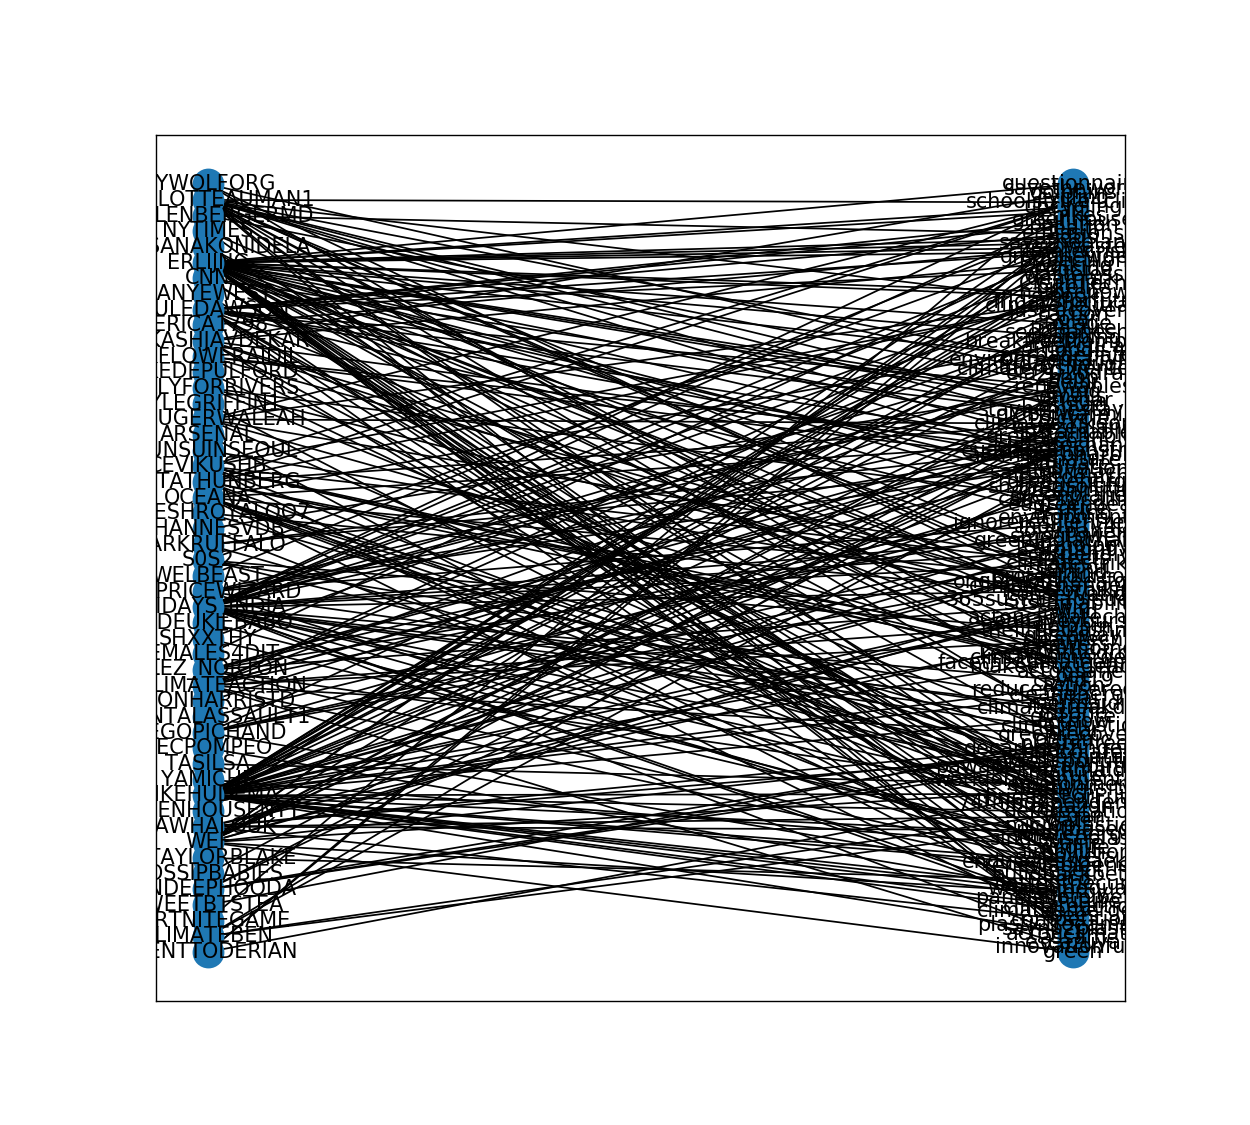

C:\Users\nguyen7\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [10]:
top = tweets[tweets.username.isin(tweets.groupby('username').sum().nretweets.sort_values(ascending = False).head(50).index)]
B=nx.Graph()
Hashtags = []
for i in top.index:
    for hashtag in top.hashtags[i]:
        if B.has_edge(top.username[i],hashtag):
            B[top.username[i]][hashtag]['weight'] +=1    
            B[top.username[i]][hashtag]['retweet'] += top[top.index == i].nretweets
        else:
            B.add_edge(top.username[i],hashtag,weight = 1,retweet=top[top.index == i].nretweets)
            Hashtags.append(hashtag)
            
plt.figure(figsize=(10,9))
nx.draw_networkx(
    B,
    pos = nx.drawing.layout.bipartite_layout(B, top.username.to_list()))

<IPython.core.display.Javascript object>


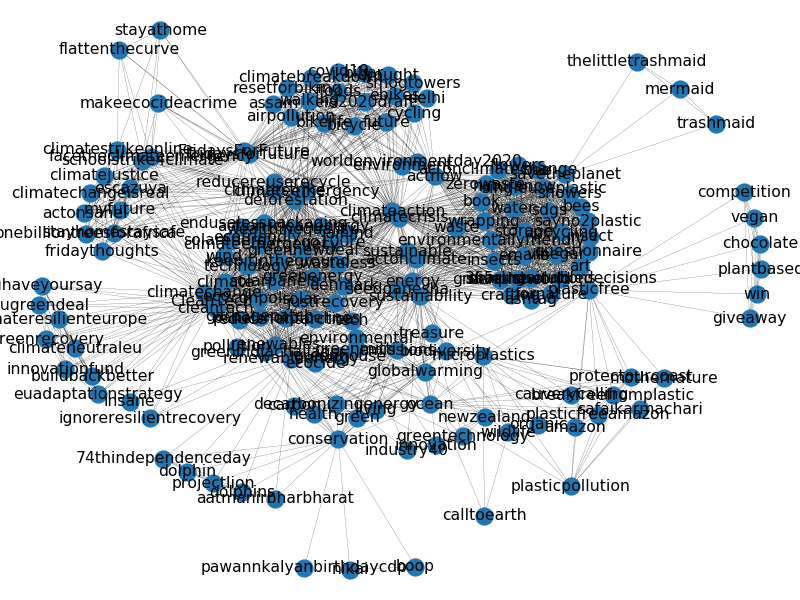

In [11]:
X = set(Hashtags)
P=bipartite.weighted_projected_graph(B,X)
Edge = P.edges(data=True)

plt.figure() #which topics are more likely connected?
nx.draw_kamada_kawai(P,with_labels=True,multigraph=True,node_size =90,font_size =9,width=0.1)

In [12]:
nx.to_pandas_edgelist(P).to_csv('Top_Projected170820.csv')

# Every one

In [13]:
B=nx.Graph()
Hashtags = []
for i in range(len(tweets)-1):
    for hashtag in tweets.hashtags[i]:
        if B.has_edge(tweets.username[i],hashtag):
            B[tweets.username[i]][hashtag]['weight'] +=1    
            B[tweets.username[i]][hashtag]['retweet'] += tweets.iloc[i].nretweets
        else:
            B.add_edge(tweets.username[i],hashtag,weight = 1,retweet=tweets.iloc[i].nretweets)
            Hashtags.append(hashtag)

In [15]:
#Bipartite Graph, left side is Users, right side is Topics (ugly I know :/)
# plt.figure(figsize=(10,9))
# nx.draw_networkx(
#     B,
#     pos = nx.drawing.layout.bipartite_layout(B, tweets.username.to_list()))

In [16]:
# X = set(Hashtags)
# P=bipartite.weighted_projected_graph(B,X)
# Edge = P.edges(data=True)

# plt.figure() #which topics are more likely connected?
# nx.draw_kamada_kawai(P,with_labels=True,multigraph=True,node_size =90,font_size =10,width=0.1)